# Baseball Case Study

Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

In [1]:
# Import the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#lets import the dataset
dt=pd.read_csv(r'C:\Users\Shalini Maurya\Desktop\dataset\Baseball.csv')
dt

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [4]:
#for better understanding lets rename the column name 
dt=dt.rename(columns={"W" : "Wins", "R" : "Runs", "AB" : "At Bats", "H" : "Hits", "2B" : "Doubles",
                               "3B" : "Triples", "HR" : "Homeruns", "BB" : "Walks", "SO" : "Strikeouts", "ER" : "Earned Runs",
                               "SB" : "Stolen Bases", "RA" : "Runs Allowed", "ERA" : "Earned Run Average (ERA)",
                               "CG" : "Complete Games", "SHO" : "Shutouts", "SV" : "Saves", "E" : "Errors"})

In [5]:
dt.head()

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average (ERA),Complete Games,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


# EDA

In [6]:
dt.shape

(30, 17)

There are 30rows and 17 columns

In [7]:
#lets see some information about columns
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Wins                      30 non-null     int64  
 1   Runs                      30 non-null     int64  
 2   At Bats                   30 non-null     int64  
 3   Hits                      30 non-null     int64  
 4   Doubles                   30 non-null     int64  
 5   Triples                   30 non-null     int64  
 6   Homeruns                  30 non-null     int64  
 7   Walks                     30 non-null     int64  
 8   Strikeouts                30 non-null     int64  
 9   Stolen Bases              30 non-null     int64  
 10  Runs Allowed              30 non-null     int64  
 11  Earned Runs               30 non-null     int64  
 12  Earned Run Average (ERA)  30 non-null     float64
 13  Complete Games            30 non-null     int64  
 14  Shutouts    

In [8]:
#lets check if there is any null value
dt.isnull().sum()

Wins                        0
Runs                        0
At Bats                     0
Hits                        0
Doubles                     0
Triples                     0
Homeruns                    0
Walks                       0
Strikeouts                  0
Stolen Bases                0
Runs Allowed                0
Earned Runs                 0
Earned Run Average (ERA)    0
Complete Games              0
Shutouts                    0
Saves                       0
Errors                      0
dtype: int64

In [10]:
#now lets check if there is any missing/zeros value available
for column in dt:
    print(column+" "+str(dt[dt[column]==0].shape[0]))

Wins 0
Runs 0
At Bats 0
Hits 0
Doubles 0
Triples 0
Homeruns 0
Walks 0
Strikeouts 0
Stolen Bases 0
Runs Allowed 0
Earned Runs 0
Earned Run Average (ERA) 0
Complete Games 3
Shutouts 0
Saves 0
Errors 0


In [11]:
dt['Complete Games']=dt['Complete Games'].replace(0,dt['Complete Games'].mean())

In [12]:
#lets check again
for column in dt:
    print(column+" "+str(dt[dt[column]==0].shape[0]))

Wins 0
Runs 0
At Bats 0
Hits 0
Doubles 0
Triples 0
Homeruns 0
Walks 0
Strikeouts 0
Stolen Bases 0
Runs Allowed 0
Earned Runs 0
Earned Run Average (ERA) 0
Complete Games 0
Shutouts 0
Saves 0
Errors 0


# Correlation matrix

In [13]:
corr=dt.corr()
corr

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average (ERA),Complete Games,Shutouts,Saves,Errors
Wins,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.121311,0.471805,0.666530,-0.089485
Runs,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.222222,-0.103274,-0.096380,-0.023262
At Bats,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.068802,-0.197321,-0.106367,0.316743
Hits,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.197888,-0.145559,-0.130371,-0.033173
Doubles,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.206027,0.057998,0.171576,0.105754
Triples,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.104248,-0.041396,-0.142370,0.126678
Homeruns,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.151876,-0.019119,-0.028540,-0.207597
Walks,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.382151,0.426004,0.099445,-0.075685
Strikeouts,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.076233,0.237721,0.126297,0.155133
Stolen Bases,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.015614,-0.106563,-0.183418,0.079149


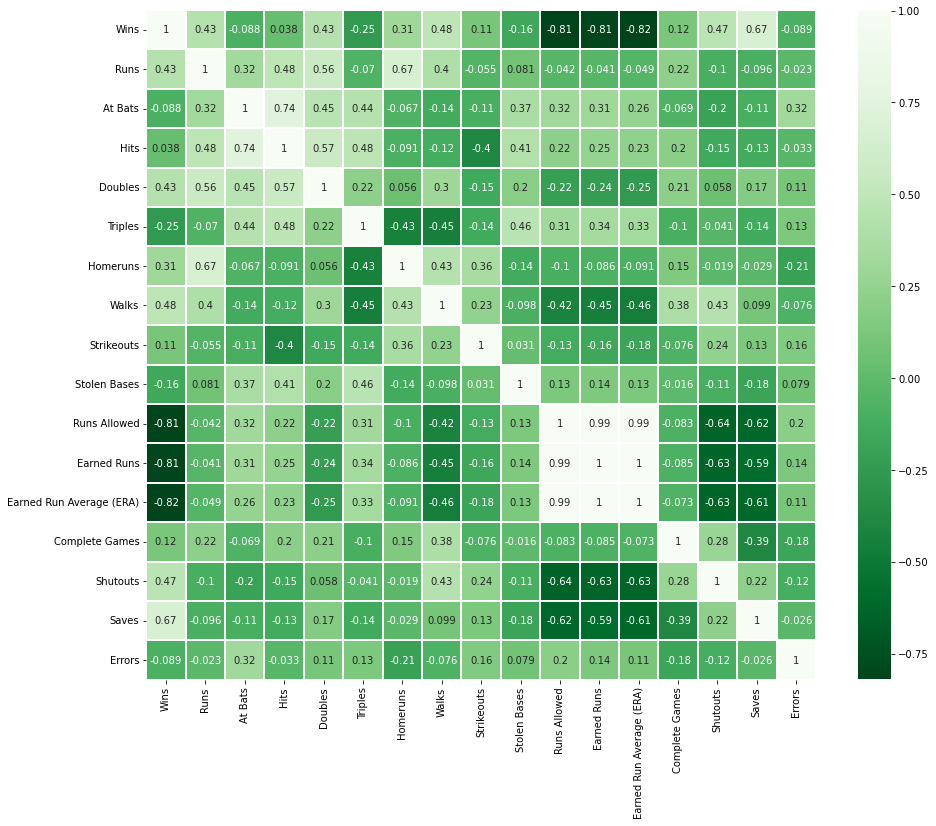

In [21]:
#lets plot a heatmap for better understanding
plt.figure(figsize = (15,15), facecolor='white')
sns.heatmap(corr, cbar=True, annot=True, cbar_kws={"shrink" : .82}, annot_kws={"size" : 10}, cmap="Greens_r",
           fmt=".2g", linewidths=.2, square=True)
plt.show()

Here we can see 'Earned Runs' and 'Earned Run average' are 100% corelated to each other and Runs allowed is 99% correlated with 'Earned Runs' and 'Earned Run average . Lets drop these two columns

In [31]:
#dt.drop('Earned Run Average (ERA)',axis=1,inplace=True)
dt.drop('Runs Allowed',axis=1,inplace=True)

In [ ]:
#lets check heatmap once again

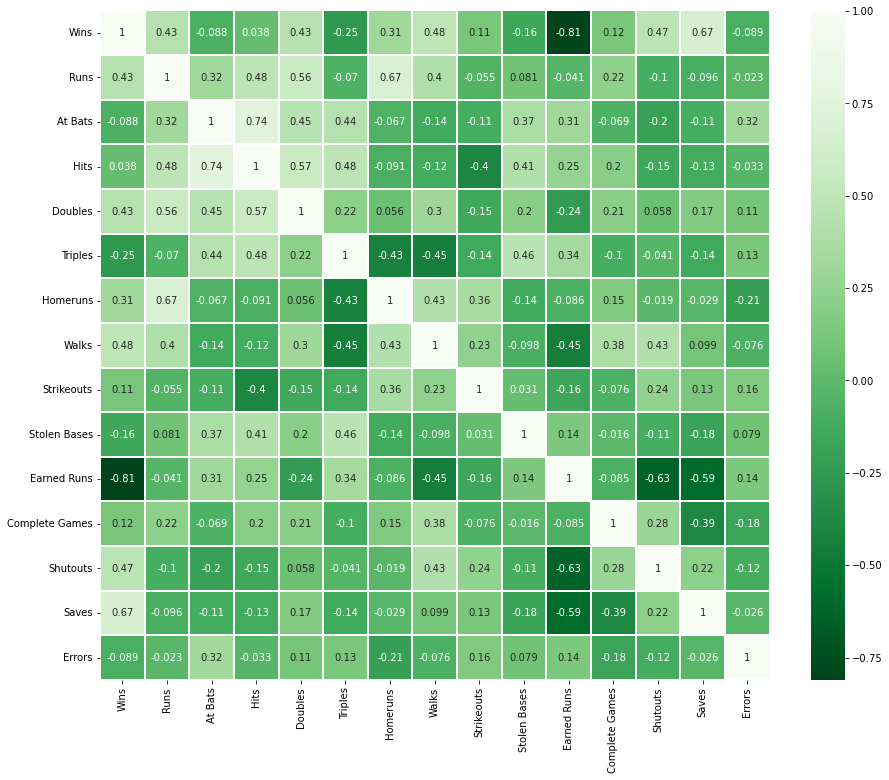

In [35]:
corr=dt.corr()
plt.figure(figsize = (15,15), facecolor='white')
sns.heatmap(corr, cbar=True, annot=True, cbar_kws={"shrink" : .82}, annot_kws={"size" : 10}, cmap="Greens_r",
           fmt=".2g", linewidths=.2, square=True)
plt.show()

Now no any features are highly corelated with each-other

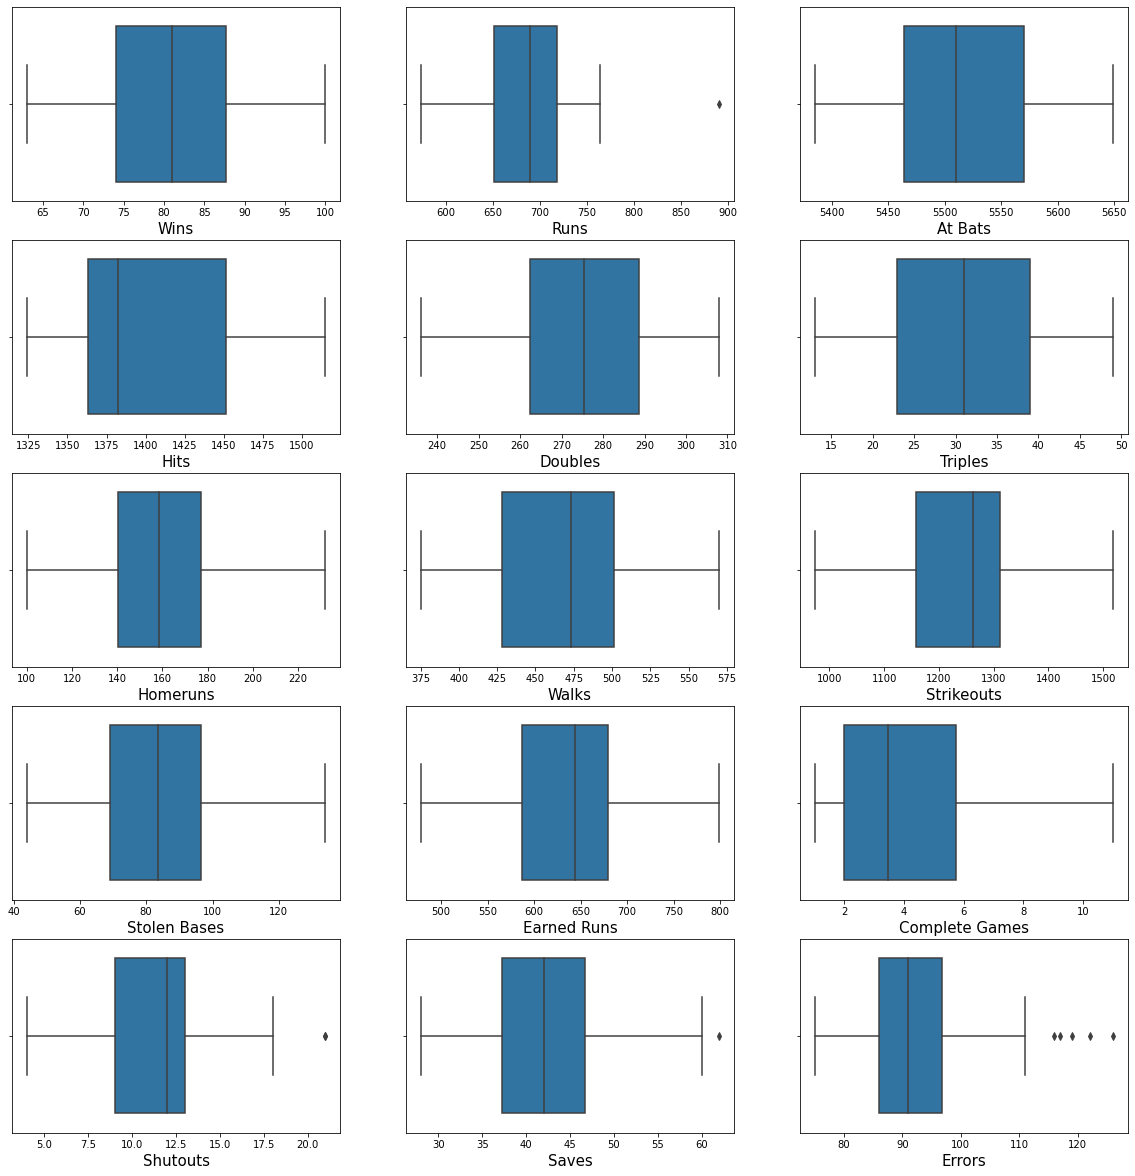

In [37]:
# Let's check the outliers

plt.figure(figsize = (20,25), facecolor='white')
graphplot = 1
for column in dt:
    if graphplot <=18:
        ax=plt.subplot(6,3,graphplot)
        sns.boxplot(dt[column])
        plt.xlabel(column,fontsize=15)
    graphplot+=1
plt.show()

Outliers are avialable in some columns---Runs, Shutouts, Saves, Erros
Lets remove it

In [44]:
# IQR skewness removing technique

q1 = dt.quantile(0.25)
q3 = dt.quantile(0.75)
iqr = q3-q1

# Runs
out_runs = (q3.Runs + (1.5*iqr.Runs))
index = np.where(dt["Runs"] > out_runs)
dt["Runs"] = dt["Runs"].drop(dt["Runs"].index[index])
dt["Runs"] = dt["Runs"].fillna(dt["Runs"].mean())

# Errors
out_errors = (q3.Errors + (1.5*iqr.Errors))
index_1 = np.where(dt["Errors"] > out_errors)
dt["Errors"] = dt["Errors"].drop(dt["Errors"].index[index_1])
dt["Errors"] = dt["Errors"].fillna(dt["Errors"].mean())



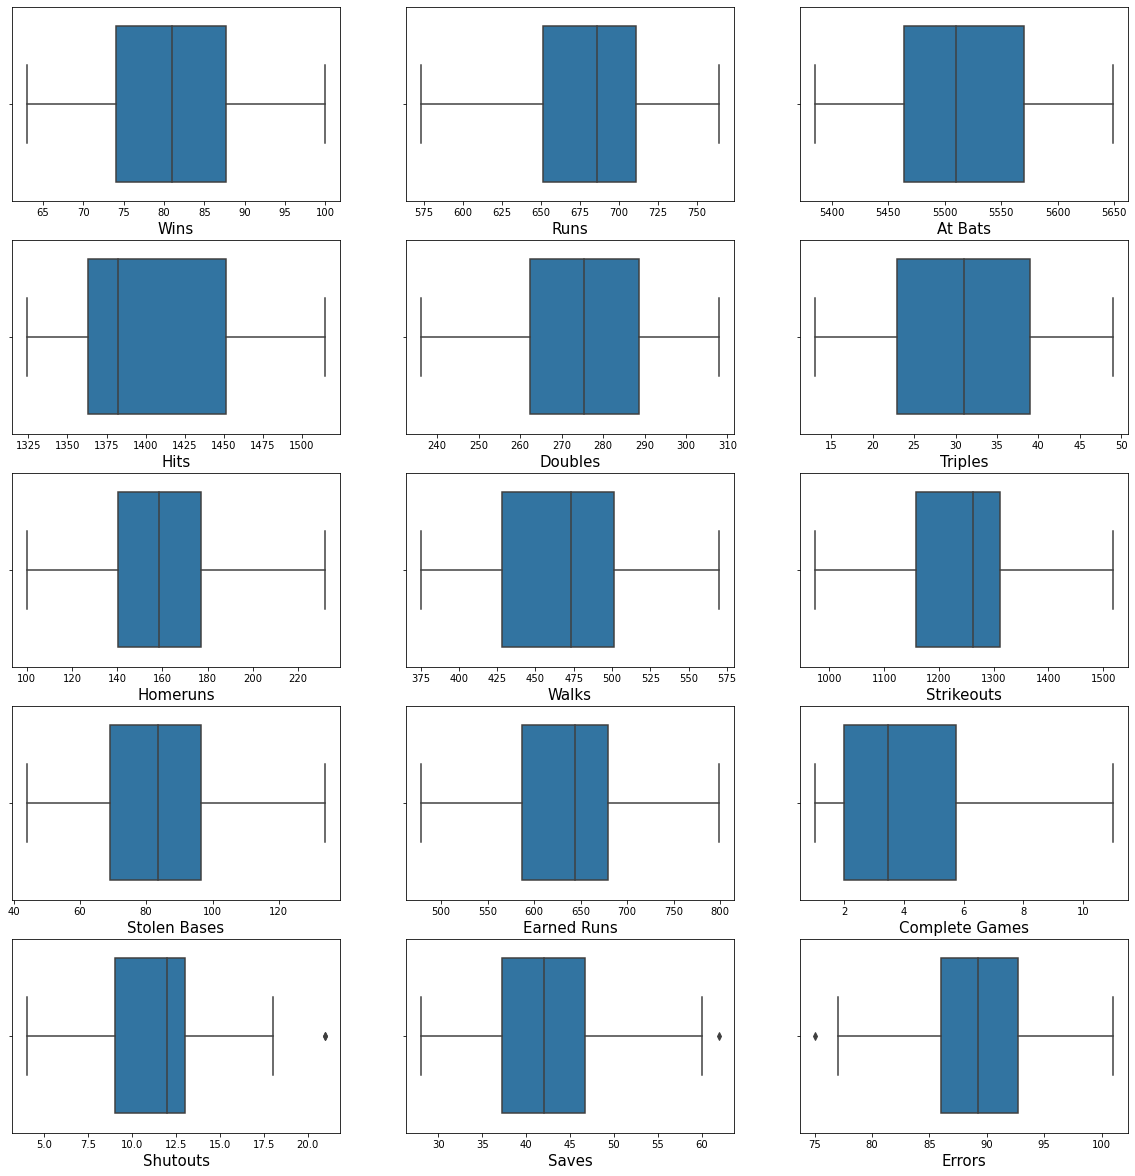

In [45]:
#lets check again the outliers
plt.figure(figsize = (20,25), facecolor='white')
graphplot = 1
for column in dt:
    if graphplot <=18:
        ax=plt.subplot(6,3,graphplot)
        sns.boxplot(dt[column])
        plt.xlabel(column,fontsize=15)
    graphplot+=1
plt.show()

In [47]:
#Lets check the skewness
dt.skew()

Wins              0.047089
Runs             -0.218636
At Bats           0.183437
Hits              0.670254
Doubles          -0.230650
Triples           0.129502
Homeruns          0.516441
Walks             0.158498
Strikeouts       -0.156065
Stolen Bases      0.479893
Earned Runs       0.058710
Complete Games    0.836848
Shutouts          0.565790
Saves             0.657524
Errors           -0.522685
dtype: float64

In [48]:
# Skewness removing technique

for index in dt.skew().index:
    if dt.skew().loc[index]>0.5:
        dt[index] = np.sqrt(dt[index])
    if dt.skew().loc[index]<-0.5:
        dt[index] = np.cbrt(dt[index])

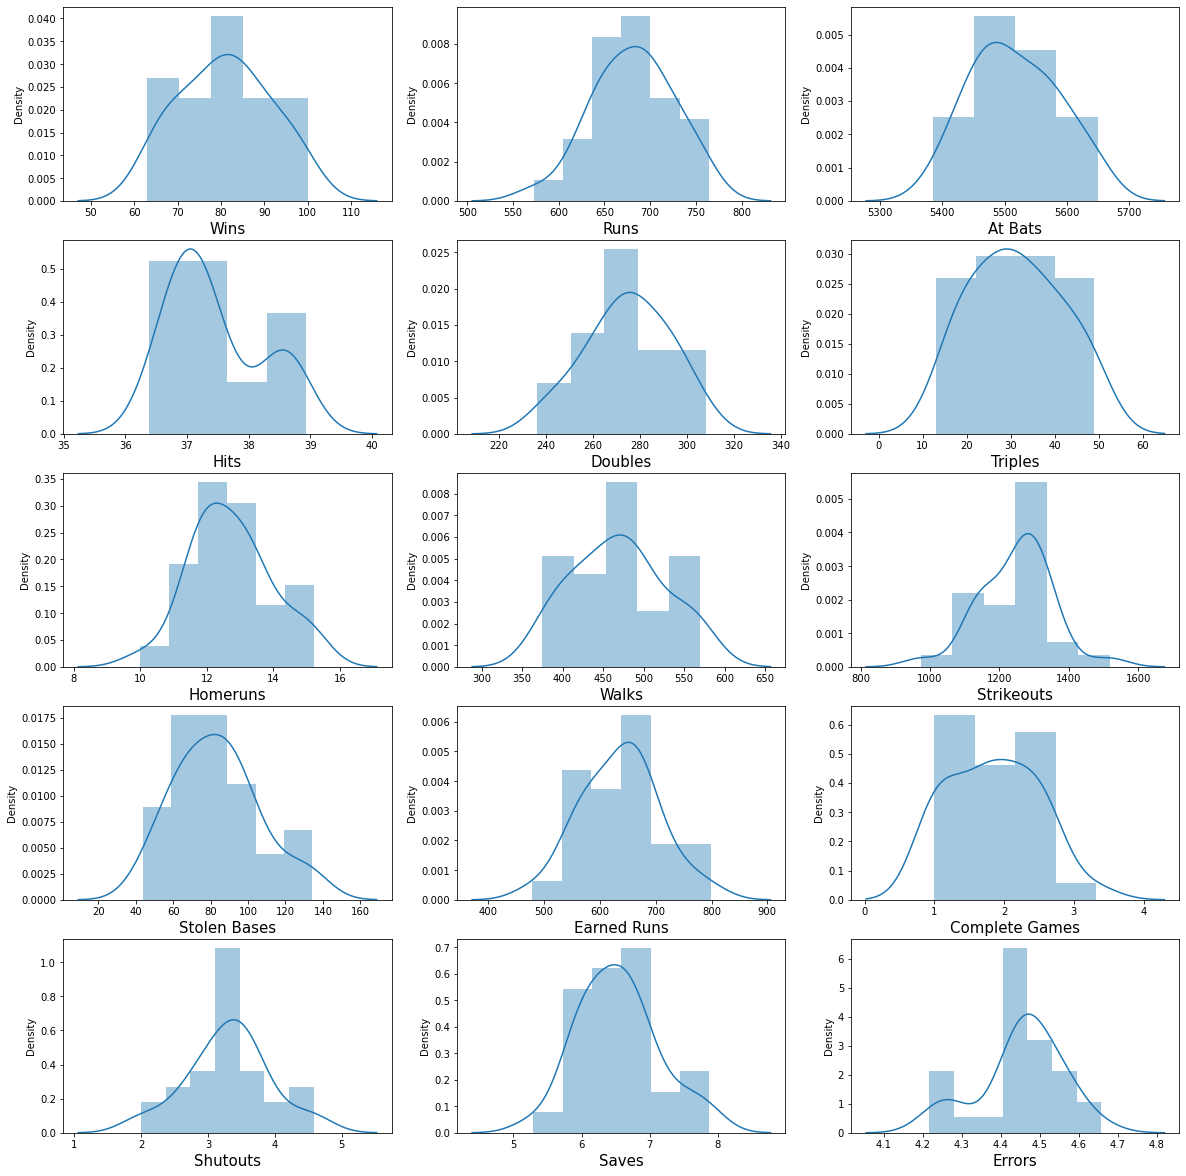

In [51]:
# Let's check the distplot

plt.figure(figsize = (20,25), facecolor='white')
graphplot = 1
for column in dt:
    if graphplot <=18:
        ax=plt.subplot(6,3,graphplot)
        sns.distplot(dt[column])
        plt.xlabel(column,fontsize=15)
    graphplot+=1
plt.show()

In [52]:
# Let's separate the inputs and output before proceeding further process

df_x = dt.drop(columns = ["Wins"], axis=1)
y = dt["Wins"]

In [55]:
# Let's do scaling to check the VIF Score

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df_x)

In [60]:
# Let's check the VIF Score

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Score"] = [variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif["Features"] = df_x.columns

vif

,VIF Score,Features
0,3.263046,Runs
1,4.023832,At Bats
2,5.504347,Hits
3,2.637743,Doubles
4,3.165447,Triples
5,2.965657,Homeruns
6,2.605811,Walks
7,1.960595,Strikeouts
8,1.805444,Stolen Bases
9,4.266083,Earned Runs


As the VIF score of all columns are less than 10, then it is fine

In [70]:
# Let's import the necessary libraries for model building

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from time import time

In [71]:
# Let's find the best random state

def model(mod):
    max_score = 0
    max_state = 0
    for i in range(1,201):
        x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = i)
        start = time()
        mod.fit(x_train, y_train)
        y_pred = mod.predict(x_test)
        score = r2_score(y_test, y_pred)
        end =time()
        if score > max_score:
            max_score = score
            max_state = i
    print("Time taken by model : {:.4f} seconds".format(end-start))
    print("Best R2 Score corresponding to ",max_state,"is ",max_score)
    print("Cross Validation Score is : ",cross_val_score(mod,X,y,cv=5,scoring='r2').mean())

In [73]:
# Linear Regression

from sklearn.linear_model import LinearRegression

LR = LinearRegression()
model(LR)

Time taken by model : 0.0000 seconds
Best R2 Score corresponding to  157 is  0.908397879548295
Cross Validation Score is :  -1.7260521620727114


In [75]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = 157)

In [81]:
from sklearn.tree import DecisionTreeRegressor


DTR = DecisionTreeRegressor()
DTR.fit(x_train,y_train)
y_pre = DTR.predict(x_test)
score = r2_score(y_test,y_pre)
cross = cross_val_score(DTR,X,y,cv=5,scoring='r2').mean()

print("Best R2 Score is : ",score)
print("Cross Validation Score is : ",cross)

Best R2 Score is :  0.04729729729729726
Cross Validation Score is :  -2.4119959694375313


In [82]:
from sklearn.neighbors import KNeighborsRegressor

KNR = KNeighborsRegressor()
KNR.fit(x_train,y_train)
y_pre = KNR.predict(x_test)
score = r2_score(y_test,y_pre)
cross = cross_val_score(KNR,X,y,cv=5,scoring='r2').mean()

print("Best R2 Score is : ",score)
print("Cross Validation Score is : ",cross)

Best R2 Score is :  0.7209909909909907
Cross Validation Score is :  0.09848776965119921


In [84]:
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor()
GBR.fit(x_train,y_train)
y_pre = GBR.predict(x_test)
score = r2_score(y_test,y_pre)
cross = cross_val_score(GBR,X,y,cv=5,scoring='r2').mean()

print("Best R2 Score is : ",score)
print("Cross Validation Score is : ",cross)

Best R2 Score is :  0.3288438537697356
Cross Validation Score is :  -1.090914133049973


In [85]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
y_pre = RFR.predict(x_test)
score = r2_score(y_test,y_pre)
cross = cross_val_score(RFR,X,y,cv=5,scoring='r2').mean()

print("Best R2 Score is : ",score)
print("Cross Validation Score is : ",cross)

Best R2 Score is :  0.6280110360360359
Cross Validation Score is :  -0.6595986947276244


In [86]:
from sklearn.ensemble import BaggingRegressor

BR = BaggingRegressor()
BR.fit(x_train,y_train)
y_pre = BR.predict(x_test)
score = r2_score(y_test,y_pre)
cross = cross_val_score(BR,X,y,cv=5,scoring='r2').mean()

print("Best R2 Score is : ",score)
print("Cross Validation Score is : ",cross)

Best R2 Score is :  0.4890202702702702
Cross Validation Score is :  -0.5306199680699191


In [87]:
# Hyper Parameter Tuning

from sklearn.model_selection import GridSearchCV

param_grid = {"fit_intercept" : [True, False],"normalize" : [True, False],"copy_X" : [True, False], "n_jobs" : [1,2]}

grid = GridSearchCV(LR,param_grid)
grid.fit(x_train, y_train)
grid.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': True}

In [88]:
# Final Model

Final_Model = LinearRegression(copy_X= True, fit_intercept = True, n_jobs = 1, normalize = True)
model(Final_Model)

Time taken by model : 0.0156 seconds
Best R2 Score corresponding to  157 is  0.9083978795482951
Cross Validation Score is :  -1.7260521620727125


In [ ]:
# Saving the Final Model

import joblib

joblib.dump(Final_Model,"Final_Baseball_Model.pkl")